In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
tf.__version__

'2.12.0'

In [29]:
datalink = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
col_names = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
df = pd.read_csv(datalink,sep="\t|[ ][ ]+",names=col_names,index_col = False)

C:\Users\Kallol dhar\AppData\Local\Temp\ipykernel_16188\2414165794.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(datalink,sep="\t|[ ][ ]+",names=col_names,index_col = False)


In [30]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,"""ford mustang gl"""
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,"""vw pickup"""
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,"""dodge rampage"""
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,"""ford ranger"""
405,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0,"""chevy s-10"""


In [31]:
df = df.drop(columns=["car name"])
df.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [32]:
df = df.dropna()
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [33]:
# df["origin"].value_counts()
df["origin"].unique()

array([1., 3., 2.])

In [34]:
categorical_col = ["origin"]
onehot = pd.get_dummies(df[categorical_col].astype("category"))
onehot = onehot*1 # to convert them into 0 and 1 instead of True or False
onehot

,origin_1.0,origin_2.0,origin_3.0
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
401,1,0,0
402,0,1,0
403,1,0,0
404,1,0,0


In [35]:
# Just to rename the columns, not really necessary
onehot[["USA","Europe","Japan"]]=onehot
onehot = onehot[["USA","Europe","Japan"]]
onehot

,USA,Europe,Japan
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
401,1,0,0
402,0,1,0
403,1,0,0
404,1,0,0


In [36]:
df.drop(columns=categorical_col,inplace=True) # Drop the original column that was one hot encoded 

In [37]:
df = pd.concat([df,onehot],axis="columns")
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1,0,0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,0,1,0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1,0,0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1,0,0


In [38]:
train_X = df.sample(frac=0.8,random_state=42)
test_X = df.drop(index=train_X.index)
len(test_X)

78

In [39]:
train_Y = train_X.pop("mpg")
test_Y = test_X.pop("mpg")
len(test_Y)

78

In [40]:
assert len(test_X)==len(test_Y),"Bug in code, number of inputs and outputs must be same"

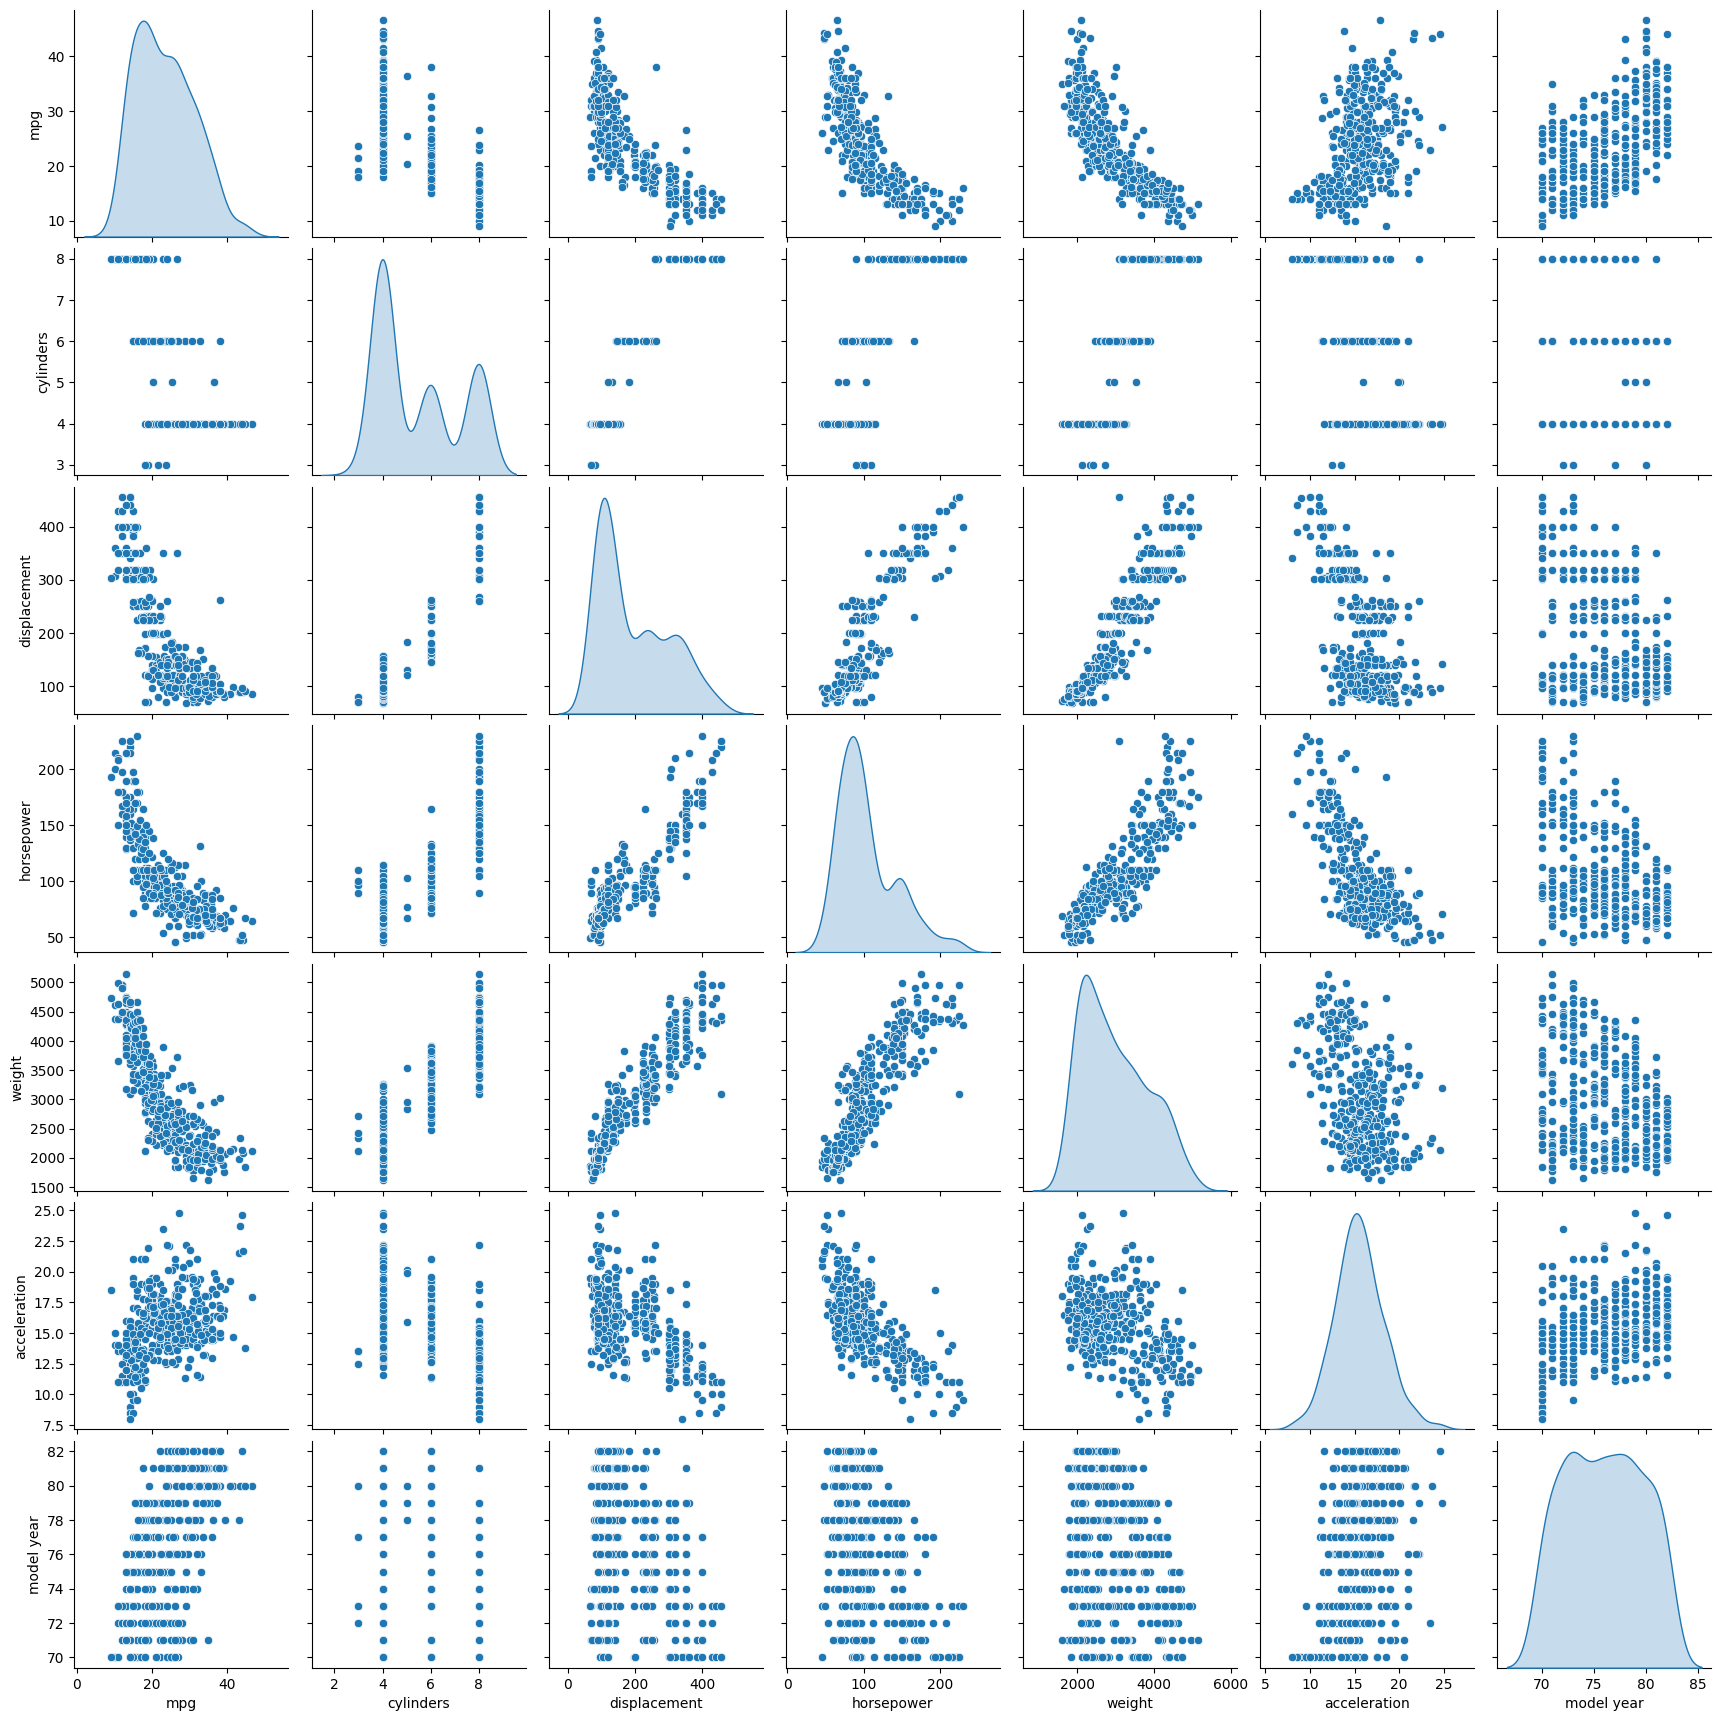

In [41]:
_ = sns.pairplot(df[["mpg", "cylinders","displacement","horsepower","weight","acceleration","model year"]],diag_kind="kde")

In [42]:
stat = train_X.describe().transpose()

In [43]:
print(stat["mean"]) # mean of individual columns

cylinders          5.531847
displacement     197.855096
horsepower       105.971338
weight          3005.745223
acceleration      15.510828
model year        75.910828
USA                0.624204
Europe             0.171975
Japan              0.203822
Name: mean, dtype: float64


In [44]:
# all input data must be normalized before going inside the model, e.g. train_X,test_X
def Z_Score_Norm(train_X):
    return (train_X - stat["mean"])/stat["std"]


In [45]:
train_X = Z_Score_Norm(train_X)
test_X = Z_Score_Norm(test_X)


In [46]:
# standard deviation should be around 1 after normalization (Z-score normaliation)
test_X.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,-0.174089,-0.162474,-0.190437,-0.164746,0.054671,0.093679,0.008248,0.019877,-0.028537
std,0.922156,0.903298,0.833260,0.936709,0.921924,0.995700,1.002703,1.021915,0.983106
min,-1.463961,-1.191106,-1.311197,-1.621242,-1.965654,-1.602290,-1.286751,-0.455006,-0.505158
25%,-0.885743,-0.937590,-0.781383,-0.946959,-0.565648,-0.789059,-1.286751,-0.455006,-0.505158
50%,-0.885743,-0.463420,-0.402945,-0.332625,-0.021697,0.024172,0.774676,-0.455006,-0.505158
75%,0.270695,0.489615,0.101640,0.397242,0.691682,0.837404,0.774676,-0.455006,-0.505158
max,1.427132,2.414463,3.003002,2.484404,2.849653,1.650635,0.774676,2.190772,1.973274


In [47]:
# Initially forgot to drop "car name". Normalized them as a result and got NaN values.
# This helped me find that bug.
test_X.isna().sum() 

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
USA             0
Europe          0
Japan           0
dtype: int64

In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation = tf.nn.relu, input_shape=[len(train_X.columns)]),
    tf.keras.layers.Dense(units=32, activation = tf.nn.relu ),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.0007),loss="mse",metrics=["mse","mae"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1280      
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [49]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.001,patience=40,restore_best_weights=True)
history = model.fit(train_X,train_Y,batch_size=32,epochs=400,validation_data=[test_X,test_Y],callbacks=[early_stop])

Epoch 1/400
10/10 [==============================] - 1s 22ms/step - loss: 591.4893 - mse: 591.4893 - mae: 22.9119 - val_loss: 642.5035 - val_mse: 642.5035 - val_mae: 24.1199
Epoch 2/400
10/10 [==============================] - 0s 6ms/step - loss: 563.3207 - mse: 563.3207 - mae: 22.2387 - val_loss: 614.1143 - val_mse: 614.1143 - val_mae: 23.5069
Epoch 3/400
10/10 [==============================] - 0s 6ms/step - loss: 533.6478 - mse: 533.6478 - mae: 21.5302 - val_loss: 582.3179 - val_mse: 582.3179 - val_mae: 22.7991
Epoch 4/400
10/10 [==============================] - 0s 6ms/step - loss: 499.4039 - mse: 499.4039 - mae: 20.6812 - val_loss: 542.9985 - val_mse: 542.9985 - val_mae: 21.9094
Epoch 5/400
10/10 [==============================] - 0s 5ms/step - loss: 456.4771 - mse: 456.4771 - mae: 19.6176 - val_loss: 496.4127 - val_mse: 496.4127 - val_mae: 20.8210
Epoch 6/400
10/10 [==============================] - 0s 5ms/step - loss: 407.6352 - mse: 407.6352 - mae: 18.3435 - val_loss: 442.8167 

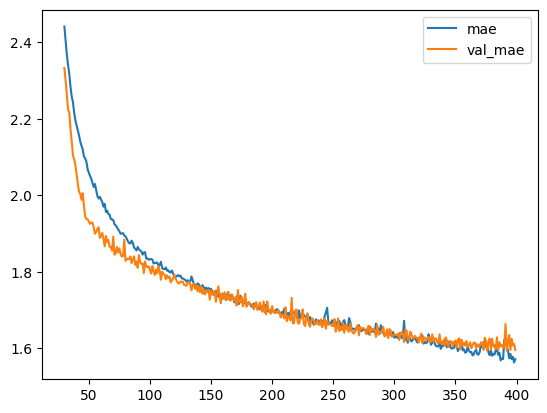

In [50]:
hist = history.history
start = 30
# Using Matplotlib
# fig,ax = plt.subplots(1,1)
# ax.plot(history.epoch[start:],hist["mae"][start:],label="mae")
# ax.plot(history.epoch[start:],hist["val_mae"][start:],label="val_mae")
# ax.legend()
# plt.show()

# Using Seaborn
fig,ax = plt.subplots(1,1)
sns.lineplot(x=history.epoch[30:],y=hist["mae"][start:], label="mae", ax=ax)
sns.lineplot(x=history.epoch[30:],y=hist["val_mae"][start:], label="val_mae", ax=ax)
ax.legend()
plt.show()
fig.clf()   # fig.clf(), not plt.clf()

3/3 [==============================] - 0s 2ms/step


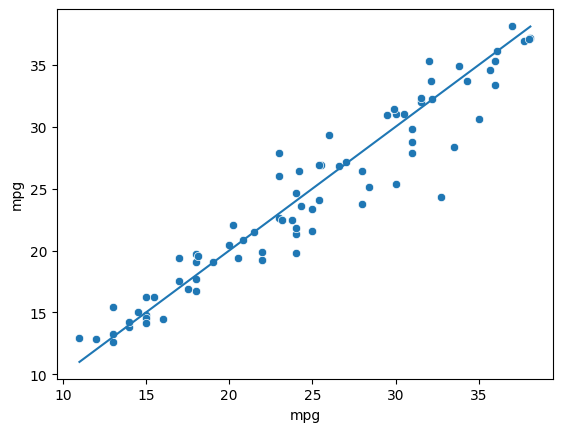

In [51]:
# Can't check accuracy for regression, so rely on this
sns.scatterplot(x=test_Y,y=model.predict(test_X).reshape(-1))
sns.lineplot(x=test_Y,y=test_Y)
plt.show()

In [52]:
result = model.evaluate(test_X,test_Y,return_dict=True,verbose=False)
result

{'loss': 4.714314937591553, 'mse': 4.714314937591553, 'mae': 1.594943642616272}